# Orbit persistence with stochastic rounding

In [1]:
using BernoulliMap, StochasticRounding, RandomNumbers

In [5]:
β = Float16(1.5)
orbits = find_orbits(Float16,β,10000)

Found 5 orbits in 0.08s.


5-element Array{Orbit{Float16},1}:
 Orbit{Float16,β=Float16(1.5)}(length=     1, min=             0.0, basin=    0.3788271723569055)
 Orbit{Float16,β=Float16(1.5)}(length=     3, min=  Float16(0.421), basin=  0.003368581071597463)
 Orbit{Float16,β=Float16(1.5)}(length=     4, min= Float16(0.2461), basin=   0.19694754730589092)
 Orbit{Float16,β=Float16(1.5)}(length=    24, min=Float16(0.01953), basin=   0.12523132003031723)
 Orbit{Float16,β=Float16(1.5)}(length=    41, min=Float16(0.05273), basin=    0.2956253792352889)

In [6]:
x_on_orbits = []

for orbit in orbits
    x = bernoulli_map(orbit.min,β,orbit.length-1)
    push!(x_on_orbits,x)
end

In [7]:
function which_orbit(x,x_on_orbits)
    norbits = length(x_on_orbits)
    for (i,orbit) in enumerate(x_on_orbits)
        x in orbit && return i
    end
    return 0
end     

which_orbit (generic function with 1 method)

## Stochastic ensemble

In [18]:
Nens = 10
Nlength = 500
Nspinup = 1000

X = fill(0,Nens,Nlength+1)

for iens in 1:Nens
    spinup = bernoulli_map(randfloat(Float16),β,Nspinup)
    xx = bernoulli_map(Float16sr(spinup[end]),Float16sr(β),Nlength)
    for (ix,x) in enumerate(xx)
        X[iens,ix] = which_orbit(Float16(x),x_on_orbits)
    end
end

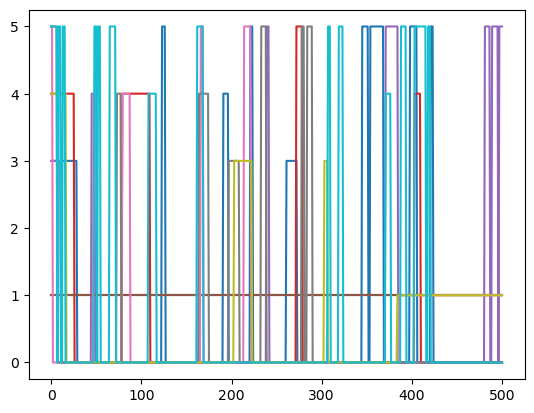

10-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4d96310>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8afb3f990>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8afb3f090>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c09190>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c21f90>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c49850>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c13890>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c13190>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c21e10>
 PyObject <matplotlib.lines.Line2D object at 0x7fd8b4c49c90>

In [19]:
using PyPlot
plot(X')